In [1]:
import matplotlib.pyplot as plt
import torch
from utils import build_model, preprocess, sim_tracing

plt.rcParams['font.size'] = 14
plt.rcParams['axes.titlesize'] = 14

In [2]:
# Load the trained model
model = build_model()

In [3]:
# Some example parameters to make simulated tympanograms
example_values = {
    'A': [   0, 1.0, 1.00, 2e-3, 5e-4],
    'B': [-150, 1.3, 0.08, 2e-3, 8e-5],
    'C': [-210, 1.3, 0.60, 2e-3, 5e-4],
}

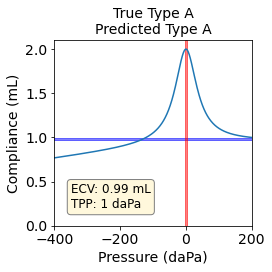

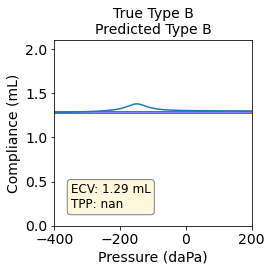

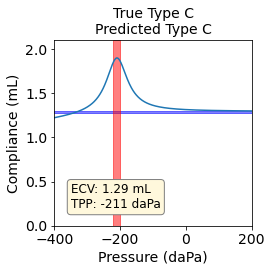

In [4]:
for key in example_values:
    # Generate tympanometry data
    pressure, compliance = sim_tracing(*example_values[key])
    
    # Perform model inference
    input_ = preprocess(pressure, compliance)
    with torch.no_grad():
        tymptype, attributes = model(input_)
    tymptype = {1:'A', 2:'B', 3:'C'}[tymptype[0].item()]
    ECV, TPP, ECV_std, TPP_std = attributes[0]
    if TPP_std > 100:
        TPP += float('nan')
    
    # Plot tympanogram, ECV, and TPP
    fig, ax = plt.subplots(figsize=(4, 4))
    ax.plot(pressure, compliance)
    ax.axhspan(ECV+2*ECV_std, ECV-2*ECV_std, alpha=.5, color='blue')
    ax.axvspan(TPP+2*TPP_std, TPP-2*TPP_std, alpha=.5, color='red')
        
    plt.xlim([-400, 200])
    plt.ylim([0.0, 2.1])
    plt.xlabel('Pressure (daPa)')
    plt.ylabel('Compliance (mL)')
    plt.title(f'True Type {key}\nPredicted Type {tymptype}')
    plt.text(-350, 0.2, 
             f'ECV: {ECV:.2f} mL\nTPP: {TPP:.0f}'+' daPa'*~TPP.isnan(),
             fontsize=12,
             bbox=dict(facecolor='cornsilk', edgecolor='gray', boxstyle='round'))
    plt.tight_layout()
    plt.show()